In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants for pendulum motion
l = 1  # length of the pendulum (m)
g = 9.81  # acceleration due to gravity (m/s^2)
angle = 90 # initial angle (degrees)
w = 0.0  # initial angular velocity (rad/s)
dt = 0.01  # time step (s)
duration = 3  # duration of simulation (s)
m = 1  # mass (kg)
a = np.radians(angle)  # initial angle (radians)

In [10]:
# Energy calculations
def calculate_energies(a, w, l, m, g):
    h = l * (1 - np.cos(a))
    V = l * w
    PE = m * g * h  # Potential energy
    KE = 0.5 * m * V**2  # Kinetic energy
    TE = PE + KE  # Total energy
    return PE, KE, TE

Improved Euler's Method
     time         a         w        PE        KE        TE
0    0.00  1.570796  0.000000  0.000000  0.000000  0.000000
1    0.00  1.570306 -0.098100  9.805188  0.004812  9.810000
2    0.01  1.568834 -0.196200  9.790753  0.019247  9.810000
3    0.02  1.566382 -0.294300  9.766694  0.043306  9.810000
4    0.03  1.562948 -0.392398  9.733012  0.076988  9.810000
..    ...       ...       ...       ...       ...       ...
297  2.96 -0.046223 -4.427244  0.010478  9.800243  9.810722
298  2.97 -0.090473 -4.420543  0.040122  9.770599  9.810721
299  2.98 -0.134634 -4.409522  0.088776  9.721944  9.810720
300  2.99 -0.178664 -4.394215  0.156155  9.654562  9.810717
301  3.00 -0.222519 -4.374664  0.241868  9.568844  9.810712

[302 rows x 6 columns]


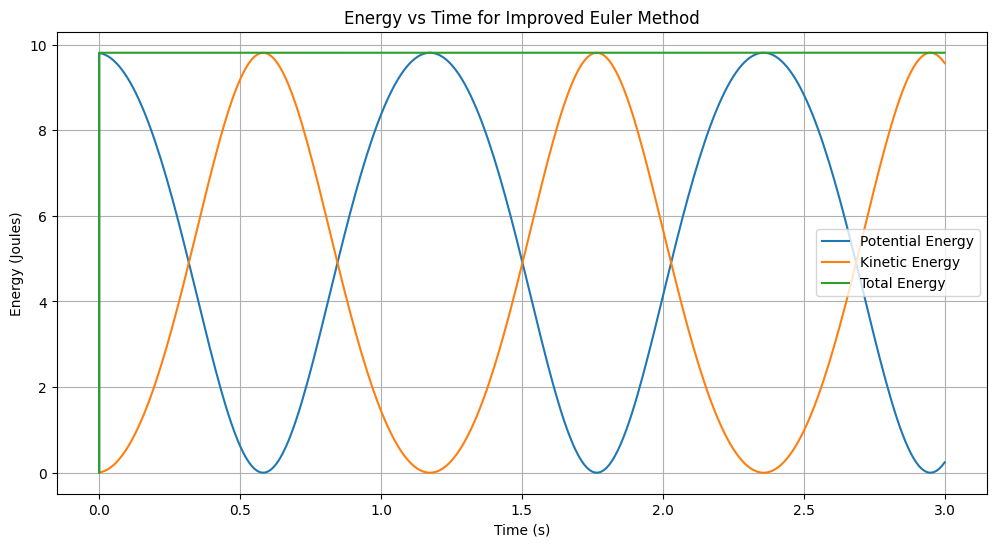

In [11]:
def improved_euler_method(a, w, dt, l, g):
    results = [(0, a, w, 0, 0, 0)]
    time = 0
    while time < duration:
        # Calculate the first set of derivatives (k1)
        k1a = w
        k1w = -g / l * np.sin(a)

        # Estimate the midpoint values using k1
        a_mid = a + k1a * dt / 2
        w_mid = w + k1w * dt / 2

        # Calculate the second set of derivatives (k2) at the midpoint
        k2a = w_mid
        k2w = -g / l * np.sin(a_mid)

        # Update the state of the pendulum using k2
        a += k2a * dt
        w += k2w * dt

        # Calculate energies based on the updated state
        PE, KE, TE = calculate_energies(a, w, l, m, g)
        results.append((time, a, w, PE, KE, TE))
        time += dt
    return results

# Running the simulation
euler_results = improved_euler_method(a, w, dt, l, g)

# Convert results to DataFrame for easy handling
euler_df = pd.DataFrame(euler_results, columns=['time', 'a', 'w', 'PE', 'KE', 'TE'])

# Display the DataFrame
print("Improved Euler's Method")
print(euler_df)

# Plotting Improved Euler Method
plt.figure(figsize=(12, 6))
plt.plot(euler_df['time'], euler_df['PE'], label='Potential Energy')
plt.plot(euler_df['time'], euler_df['KE'], label='Kinetic Energy')
plt.plot(euler_df['time'], euler_df['TE'], label='Total Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (Joules)')
plt.title('Energy vs Time for Improved Euler Method')
plt.legend()
plt.grid(True)
plt.show()

RK4 Method
     time         a         w        PE        KE    TE
0    0.00  1.570796  0.000000  0.000000  0.000000  0.00
1    0.00  1.570306 -0.098100  9.805188  0.004812  9.81
2    0.01  1.568834 -0.196200  9.790753  0.019247  9.81
3    0.02  1.566382 -0.294299  9.766694  0.043306  9.81
4    0.03  1.562948 -0.392398  9.733012  0.076988  9.81
..    ...       ...       ...       ...       ...   ...
297  2.96 -0.045162 -4.427188  0.010003  9.799998  9.81
298  2.97 -0.089404 -4.420593  0.039180  9.770820  9.81
299  2.98 -0.133559 -4.409679  0.087366  9.722634  9.81
300  2.99 -0.177584 -4.394479  0.154278  9.655722  9.81
301  3.00 -0.221435 -4.375037  0.239527  9.570473  9.81

[302 rows x 6 columns]


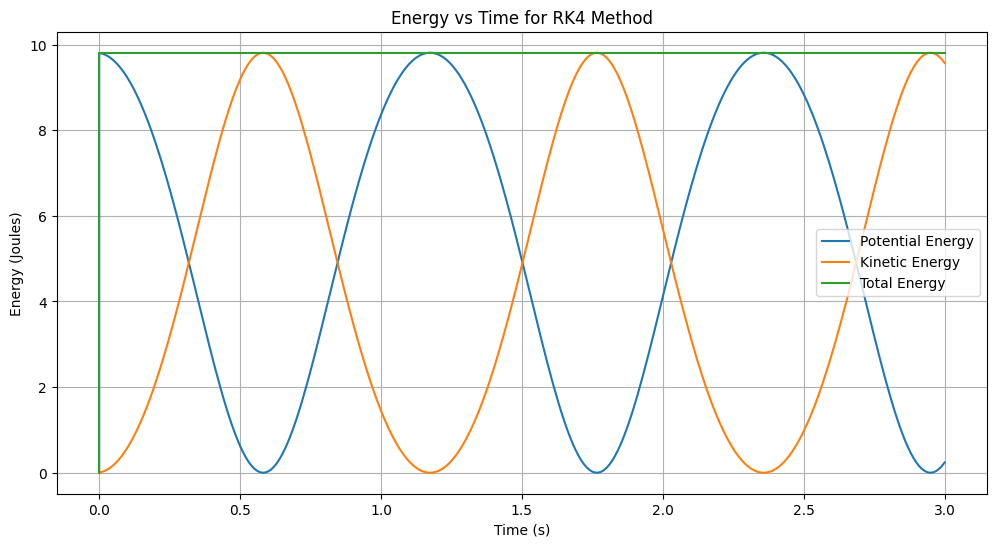

In [12]:
def rk4_method(a, w, dt, l, g):
    results = [(0, a, w, 0, 0, 0)]
    time = 0
    while time < duration:
        # Calculate the first set of derivatives (k1)
        k1a = w
        k1w = -g / l * np.sin(a)

        # Calculate intermediate values for the second set of derivatives (k2)
        a2 = a + k1a * dt / 2
        w2 = w + k1w * dt / 2
        k2a = w2
        k2w = -g / l * np.sin(a2)

        # Calculate intermediate values for the third set of derivatives (k3)
        a3 = a + k2a * dt / 2
        w3 = w + k2w * dt / 2
        k3a = w3
        k3w = -g / l * np.sin(a3)

        # Calculate values for the fourth set of derivatives (k4)
        a4 = a + k3a * dt
        w4 = w + k3w * dt
        k4a = w4
        k4w = -g / l * np.sin(a4)

        # Update the state of the pendulum using a weighted average of k1, k2, k3, k4
        a += (k1a + 2*k2a + 2*k3a + k4a) / 6 * dt
        w += (k1w + 2*k2w + 2*k3w + k4w) / 6 * dt

        # Calculate energies based on the updated state
        PE, KE, TE = calculate_energies(a, w, l, m, g)
        results.append((time, a, w, PE, KE, TE))
        time += dt
    return results

# Running the simulation
rk4_results = rk4_method(a, w, dt, l, g)

# Convert results to DataFrame for easy handling
rk4_df = pd.DataFrame(rk4_results, columns=['time', 'a', 'w', 'PE', 'KE', 'TE'])

# Display the DataFrame
print("RK4 Method")
print(rk4_df)

# Plotting RK4 Method
plt.figure(figsize=(12, 6))
plt.plot(rk4_df['time'], rk4_df['PE'], label='Potential Energy')
plt.plot(rk4_df['time'], rk4_df['KE'], label='Kinetic Energy')
plt.plot(rk4_df['time'], rk4_df['TE'], label='Total Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (Joules)')
plt.title('Energy vs Time for RK4 Method')
plt.legend()
plt.grid(True)
plt.show()